# Data exploration FD001

## Libraries

In [2]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sys.path.append(str(Path.cwd().parent / 'utils'))
from load_dataset import load_dataset

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

## Load dataset

In [3]:
train, test, rul = load_dataset('FD001')
display(train.info())
display(test.info())
display(rul.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_id      20631 non-null  int64  
 1   time_cycles  20631 non-null  int64  
 2   setting_1    20631 non-null  float64
 3   setting_2    20631 non-null  float64
 4   setting_3    20631 non-null  float64
 5   sensor_1     20631 non-null  float64
 6   sensor_2     20631 non-null  float64
 7   sensor_3     20631 non-null  float64
 8   sensor_4     20631 non-null  float64
 9   sensor_5     20631 non-null  float64
 10  sensor_6     20631 non-null  float64
 11  sensor_7     20631 non-null  float64
 12  sensor_8     20631 non-null  float64
 13  sensor_9     20631 non-null  float64
 14  sensor_10    20631 non-null  float64
 15  sensor_11    20631 non-null  float64
 16  sensor_12    20631 non-null  float64
 17  sensor_13    20631 non-null  float64
 18  sensor_14    20631 non-null  float64
 19  sens

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_id      13096 non-null  int64  
 1   time_cycles  13096 non-null  int64  
 2   setting_1    13096 non-null  float64
 3   setting_2    13096 non-null  float64
 4   setting_3    13096 non-null  float64
 5   sensor_1     13096 non-null  float64
 6   sensor_2     13096 non-null  float64
 7   sensor_3     13096 non-null  float64
 8   sensor_4     13096 non-null  float64
 9   sensor_5     13096 non-null  float64
 10  sensor_6     13096 non-null  float64
 11  sensor_7     13096 non-null  float64
 12  sensor_8     13096 non-null  float64
 13  sensor_9     13096 non-null  float64
 14  sensor_10    13096 non-null  float64
 15  sensor_11    13096 non-null  float64
 16  sensor_12    13096 non-null  float64
 17  sensor_13    13096 non-null  float64
 18  sensor_14    13096 non-null  float64
 19  sens

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   RUL     100 non-null    int64
dtypes: int64(1)
memory usage: 932.0 bytes


None

All variables are floar or int and there is no null data

In [4]:
print(f"Train: {train.shape}, Test: {test.shape}, RUL: {rul.shape}")

Train: (20631, 27), Test: (13096, 26), RUL: (100, 1)


The train df has one columm more because the RUL of each column is in the same file not

In [5]:
print(f"Train engines: {train['unit_id'].nunique()}")
print(f"Test engines: {test['unit_id'].nunique()}")
print(f"Total train cycles: {len(train)}")
print(f"Total test cycles: {len(test)}")

Train engines: 100
Test engines: 100
Total train cycles: 20631
Total test cycles: 13096


In [6]:
print("RUL statistics (train):")
print(train['RUL'].describe())

RUL statistics (train):
count    20631.000000
mean       107.807862
std         68.880990
min          0.000000
25%         51.000000
50%        103.000000
75%        155.000000
max        361.000000
Name: RUL, dtype: float64


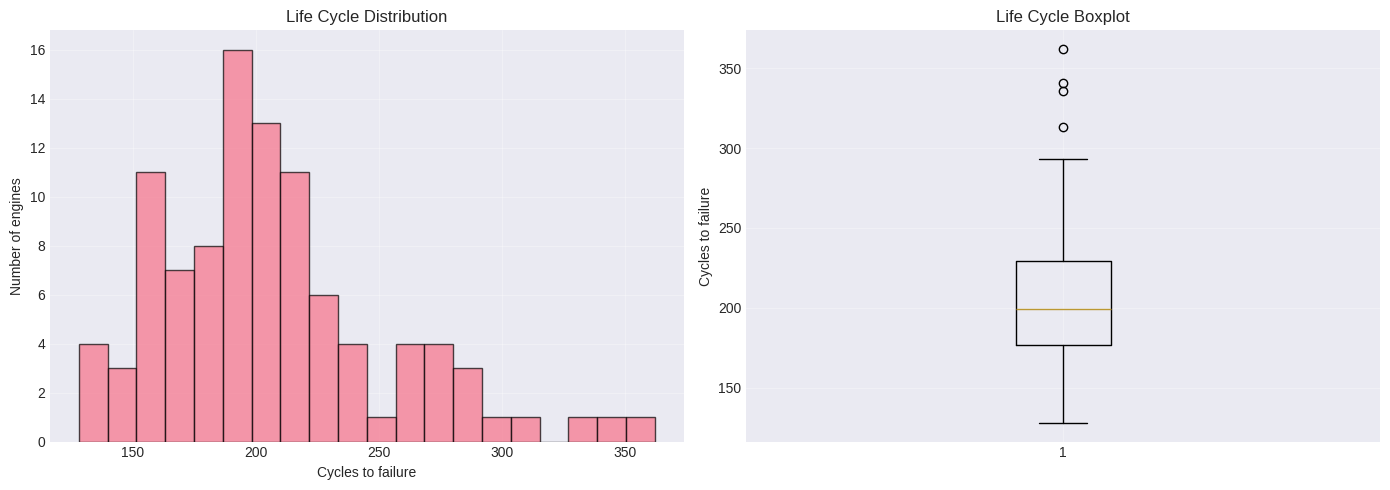

Average cycles: 206.3
Min: 128, Max: 362


In [7]:
cycles_per_unit = train.groupby('unit_id')['time_cycles'].max()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(cycles_per_unit, bins=20, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Cycles to failure')
axes[0].set_ylabel('Number of engines')
axes[0].set_title('Life Cycle Distribution')
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(cycles_per_unit, vert=True)
axes[1].set_ylabel('Cycles to failure')
axes[1].set_title('Life Cycle Boxplot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Average cycles: {cycles_per_unit.mean():.1f}")
print(f"Min: {cycles_per_unit.min()}, Max: {cycles_per_unit.max()}")

The histogram shows that most engines fail between 150-250 cycles, with a peak at around 200 cycles where approximately 16 engines fail. The distribution is roughly normal with a slight right tail, ranging from 128 to 362 cycles, indicating considerable variability in engine lifespan due to initial wear and manufacturing differences. The boxplot confirms this, showing a median life of ~200 cycles, with 50% of engines failing between 175-225 cycles (IQR). Two outliers lasted exceptionally long (~315 and ~362 cycles), while the typical range spans from 128 to 290 cycles. This variability is important for RUL prediction models, as not all engines degrade at the same rate.

In [8]:
sensor_cols = [f'sensor_{i}' for i in range(1, 22)]
sensor_variance = train[sensor_cols].var()

constant_sensors = sensor_variance[sensor_variance < 0.001].index.tolist()
print("Constant sensors (to remove):")
print(constant_sensors)

useful_sensors = [s for s in sensor_cols if s not in constant_sensors]
print(f"\nUseful sensors: {len(useful_sensors)}")
print(useful_sensors)

Constant sensors (to remove):
['sensor_1', 'sensor_5', 'sensor_6', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19']

Useful sensors: 14
['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21']


We remove constant sensors because they provide no useful information for anomaly detection or RUL prediction. These sensors show near-zero variance (< 0.001), meaning their values don't change throughout the engine's life cycle. Since they remain constant regardless of degradation, they cannot help identify when an engine is failing. Including them would only add noise and increase computational cost without improving model performance. We keep the 14 useful sensors that actually vary with engine condition and can capture degradation patterns.

In [9]:
constant_sensors = [
    'sensor_1', 'sensor_5', 'sensor_6', 'sensor_10', 
    'sensor_16', 'sensor_18', 'sensor_19'
]

train = train.drop(columns=constant_sensors)
test = test.drop(columns=constant_sensors)

print(f"New train shape: {train.shape}")
print(f"New test shape: {test.shape}")

New train shape: (20631, 20)
New test shape: (13096, 19)


In [10]:
scaler = StandardScaler()
train[useful_sensors] = scaler.fit_transform(train[useful_sensors])
test[useful_sensors] = scaler.transform(test[useful_sensors])

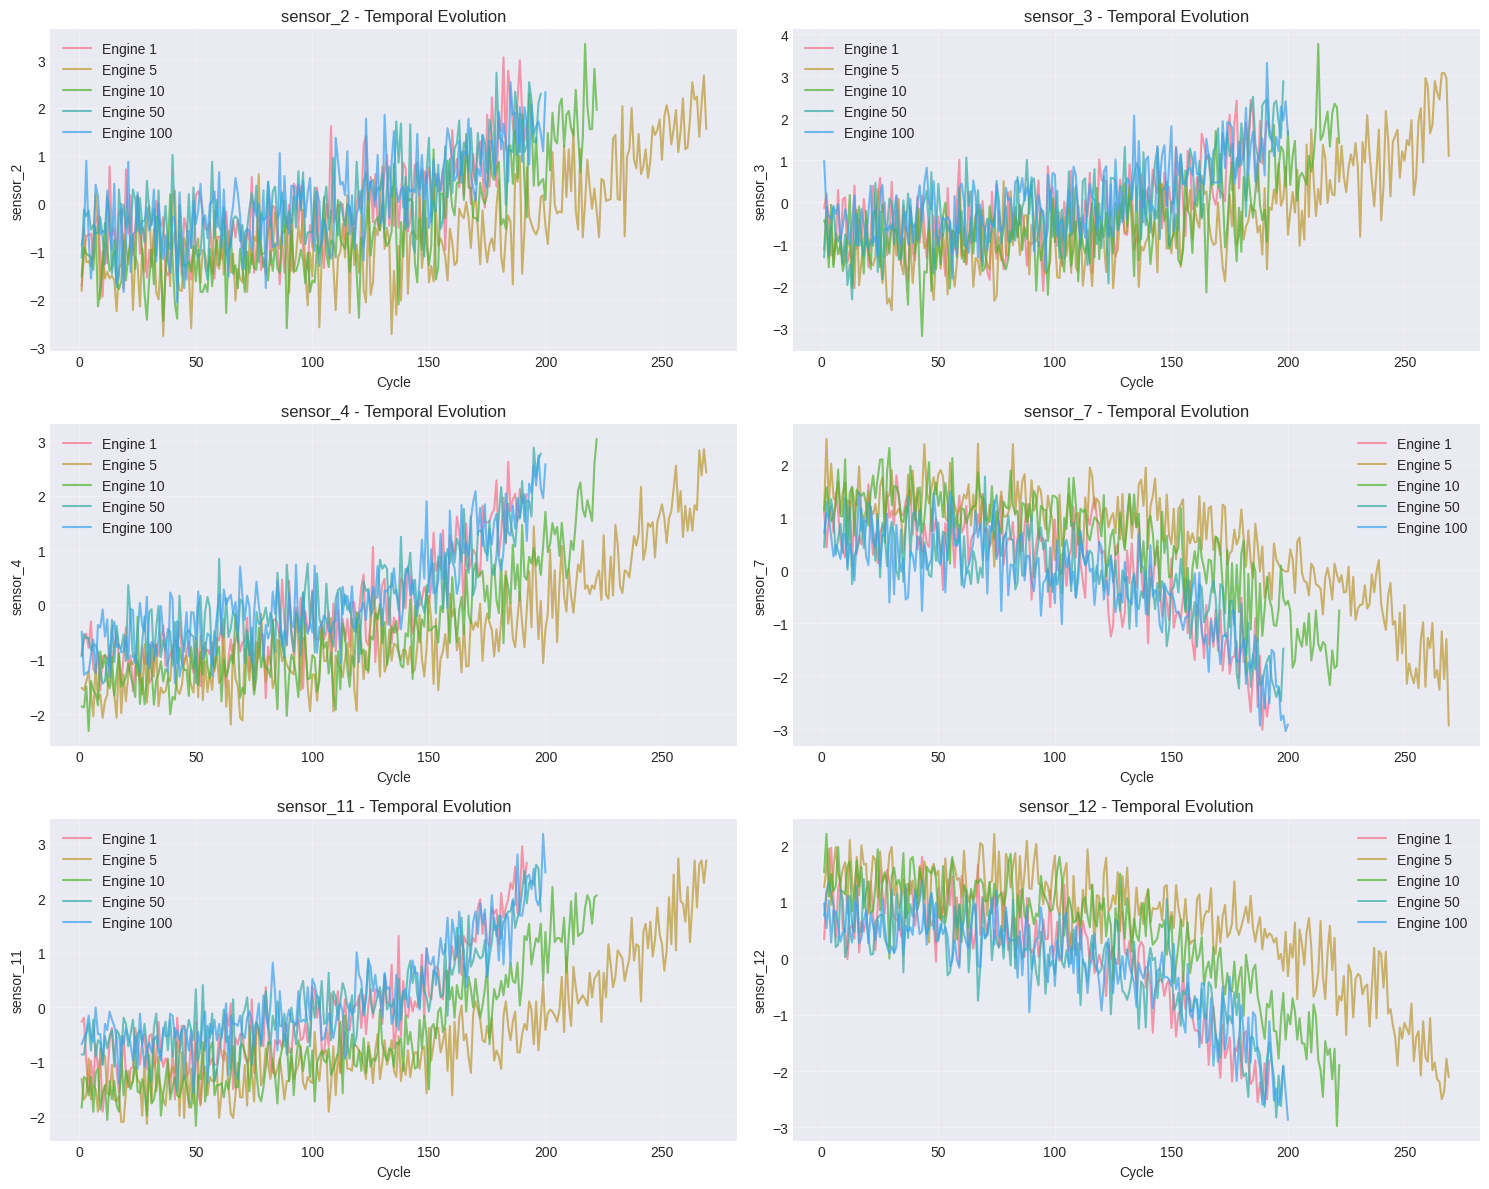

In [11]:
sample_units = [1, 5, 10, 50, 100]
sample_sensors = ['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_11', 'sensor_12']

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for idx, sensor in enumerate(sample_sensors):
    ax = axes[idx]
    
    for unit in sample_units:
        motor_data = train[train['unit_id'] == unit]
        ax.plot(motor_data['time_cycles'], motor_data[sensor], 
                alpha=0.7, label=f'Engine {unit}')
    
    ax.set_xlabel('Cycle')
    ax.set_ylabel(sensor)
    ax.set_title(f'{sensor} - Temporal Evolution')
    ax.legend()
    ax.grid(True, alpha=0.3)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train[useful_sensors] = scaler.fit_transform(train[useful_sensors])
test[useful_sensors] = scaler.transform(test[useful_sensors])
plt.tight_layout()
plt.show()

### Temporal Evolution Analysis

#### Axes Explanation
- **X-axis (Cycle):** Time progression from engine start (0) to failure (~200-300 cycles). Each point = one operational cycle.
- **Y-axis (Sensor value):** Physical measurements (temperature, pressure, speed) with sensor-specific scales.

#### Sensor Behavior

**Sensor 2 (~641-644) & Sensor 3 (~1570-1610)**
- High-frequency noise with stable means
- No clear degradation trend
- Represent operational fluctuations only
- Not useful for failure prediction

**Sensor 4 (~1390-1435)**
- Clear upward trend indicating degradation
- Values systematically increase from ~1400 to ~1430 as failure approaches
- Critical feature capturing progressive wear
- **Strong RUL predictor**

**Sensor 7 (~551-555)**
- Downward trend, especially after cycle 150
- Values decline from ~554 to ~551-552 near failure
- Indicates declining performance
- **Strong RUL predictor**.

**Sensor 11 (~47.0-48.4)**
- Strong upward trend, especially after cycle 150
- Values increase from ~47.0 to ~48.4 near failure
- Clear acceleration in degradation rate
- **Excellent RUL predictor**

**Sensor 12 (~519.5-523.0)**
- Downward trend becoming pronounced after cycle 150
- Values decline from ~522.5 to ~519.5 near failure
- Similar pattern to Sensor 7
- **Strong RUL predictor**

#### Conclusion

As engines age (X increases), systematic changes in sensor readings (Y-axis) reveal degradation patterns. **Sensors 4 & 11 (increasing)** and **Sensors 7 & 12 (decreasing)** are key degradation indicators essential for RUL prediction. Sensors 11 and 12 show the clearest late-stage degradation signals. Sensors 2 & 3 primarily contribute noise.

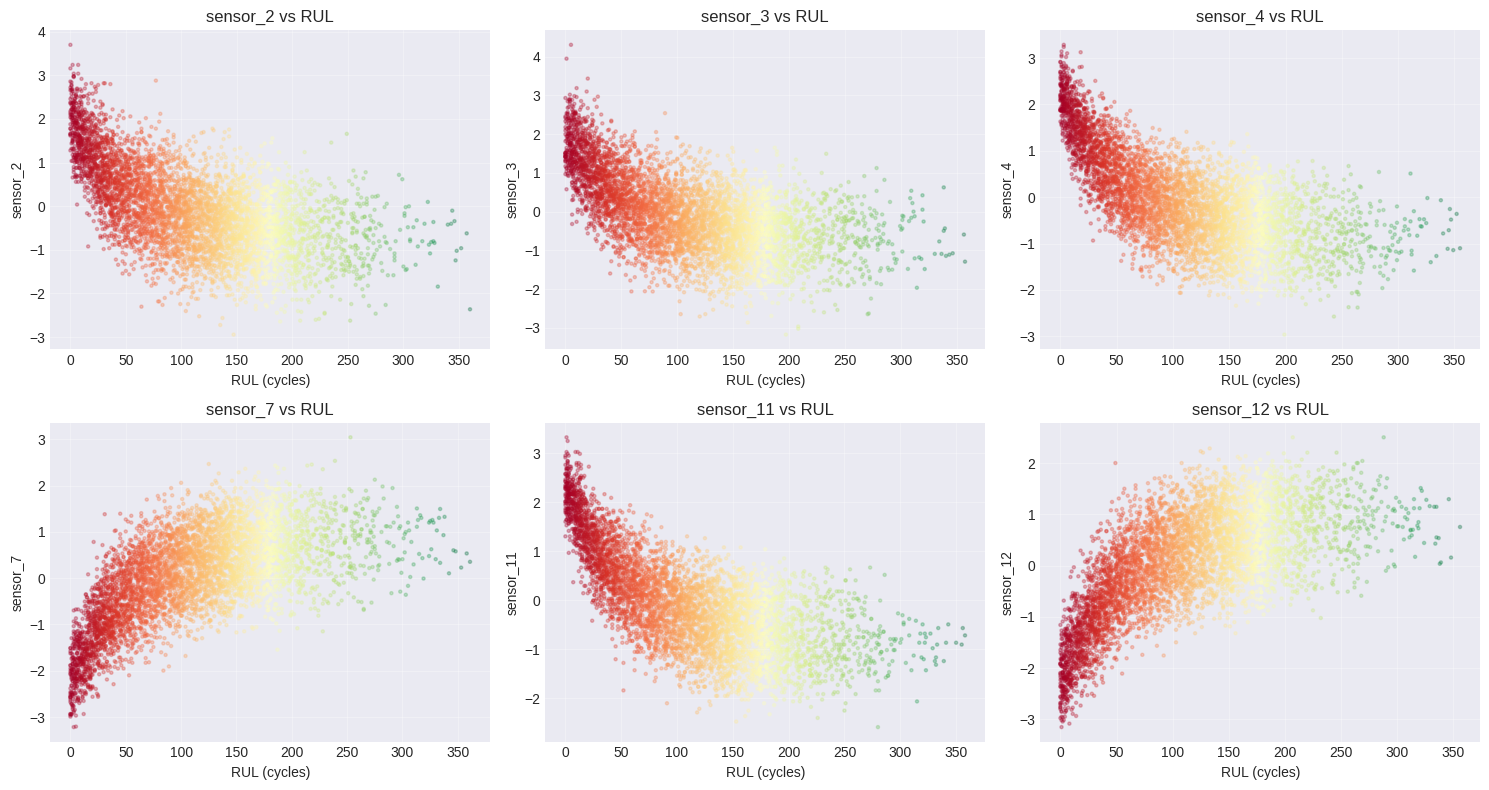

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, sensor in enumerate(sample_sensors):
    ax = axes[idx]
    sample_data = train.sample(min(5000, len(train)))
    
    scatter = ax.scatter(sample_data['RUL'], sample_data[sensor], 
                        alpha=0.3, c=sample_data['RUL'], 
                        cmap='RdYlGn', s=5)
    ax.set_xlabel('RUL (cycles)')
    ax.set_ylabel(sensor)
    ax.set_title(f'{sensor} vs RUL')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Sensor vs RUL Analysis (Standardized)

### Axes
- **X-axis:** RUL in cycles (higher = healthier)
- **Y-axis:** Standardized z-scores (mean=0, std=1)
- **Colors:** Red (low RUL, near failure) → Green (high RUL, healthy)

### Interpretation

**Sensor 2 & 3:**
- Random scatter, no correlation
- Red/green overlap completely
- **Not predictive**

**Sensor 4:**
- Negative correlation
- Red zone: High values (+2 to +3)
- Green zone: Low values (-1 to 0)
- **Strong predictor**

**Sensor 7:**
- Positive correlation
- Red zone: Extreme lows (-3 to -4)
- Green zone: Positive values (+1 to +2)
- **Strong predictor**

**Sensor 11:**
- Strong negative correlation
- Red zone: High values (+2 to +4)
- Green zone: Negative values (-1 to 0)
- Clearest separation
- **Excellent predictor**

**Sensor 12:**
- Strong positive correlation
- Red zone: Low values (-2 to -3)
- Green zone: Positive values (+1 to +2)
- Clear separation
- **Excellent predictor**

### Conclusion
Standardization reveals: sensors crossing ±2 thresholds indicate critical states. **Sensors 11 & 12** show strongest RUL relationships with minimal overlap between health states. Sensors 4 & 7 also predictive. Sensors 2 & 3 remain noise.

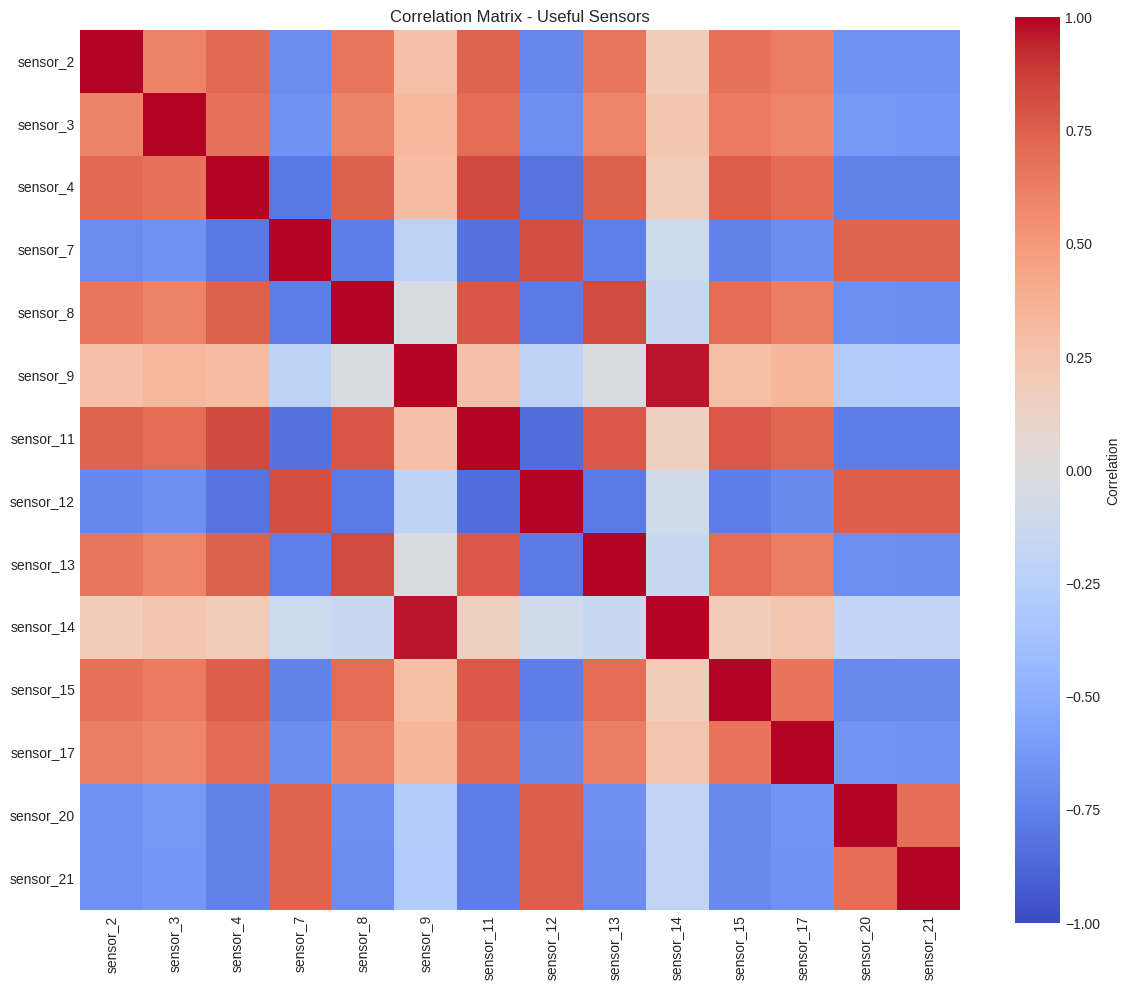

In [13]:
correlation_matrix = train[useful_sensors].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True, 
            cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix - Useful Sensors')
plt.tight_layout()
plt.show()

In [14]:
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.8:
            corr_pairs.append({
                'Sensor 1': correlation_matrix.columns[i],
                'Sensor 2': correlation_matrix.columns[j],
                'Correlation': corr_val
            })

corr_df = pd.DataFrame(corr_pairs).sort_values('Correlation', 
                                                key=abs, 
                                                ascending=False)
print("High correlations (|r| > 0.8):")
print(corr_df)

High correlations (|r| > 0.8):
    Sensor 1   Sensor 2  Correlation
5   sensor_9  sensor_14     0.963157
6  sensor_11  sensor_12    -0.846884
0   sensor_4  sensor_11     0.830136
4   sensor_8  sensor_13     0.826084
2   sensor_7  sensor_11    -0.822805
1   sensor_4  sensor_12    -0.815591
3   sensor_7  sensor_12     0.812713


## Correlation Matrix Analysis (Standardized)

### Color Scale
- **Red (+1.0):** Perfect positive correlation
- **Blue (-1.0):** Perfect negative correlation  
- **White (0):** No correlation

### High Correlations (|r| > 0.8)

**Positive (Red):**
- sensor_9 ↔ sensor_14: 0.96 (nearly identical)
- sensor_4 ↔ sensor_11: 0.83
- sensor_8 ↔ sensor_13: 0.83

**Negative (Blue):**
- sensor_11 ↔ sensor_12: -0.85
- sensor_7 ↔ sensor_11: -0.82
- sensor_4 ↔ sensor_12: -0.82
- sensor_7 ↔ sensor_12: 0.81

### Implications

**Redundancy:** Sensors 9 & 14 provide duplicate info (r=0.96) - can remove one.

**Complementary signals:** Negative correlations indicate sensors capture opposite degradation aspects:
- As sensor_11 increases, sensor_12 decreases
- As sensor_7 drops, sensor_11 rises

**Feature reduction:** Keep one from each redundant pair: {9 or 14}, {8 or 13}. Won't affect tree-based models but helps reduce noise.

Standardization doesn't change correlations - patterns identical to raw data.

In [15]:
# Remove sensors 9 and 10 from useful_sensors list
sensors_to_remove = ['sensor_9', 'sensor_20']
useful_sensors = [s for s in useful_sensors if s not in sensors_to_remove]

# Drop from dataframes
train = train.drop(columns=sensors_to_remove, errors='ignore')
test = test.drop(columns=sensors_to_remove, errors='ignore')

print(f"Updated useful sensors: {len(useful_sensors)}")
print(useful_sensors)
print(f"\nNew train shape: {train.shape}")
print(f"New test shape: {test.shape}")

Updated useful sensors: 12
['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_21']

New train shape: (20631, 18)
New test shape: (13096, 17)


As sensor 9 and 10 are correlated with other sensors, we remove one of them to make the data simplier

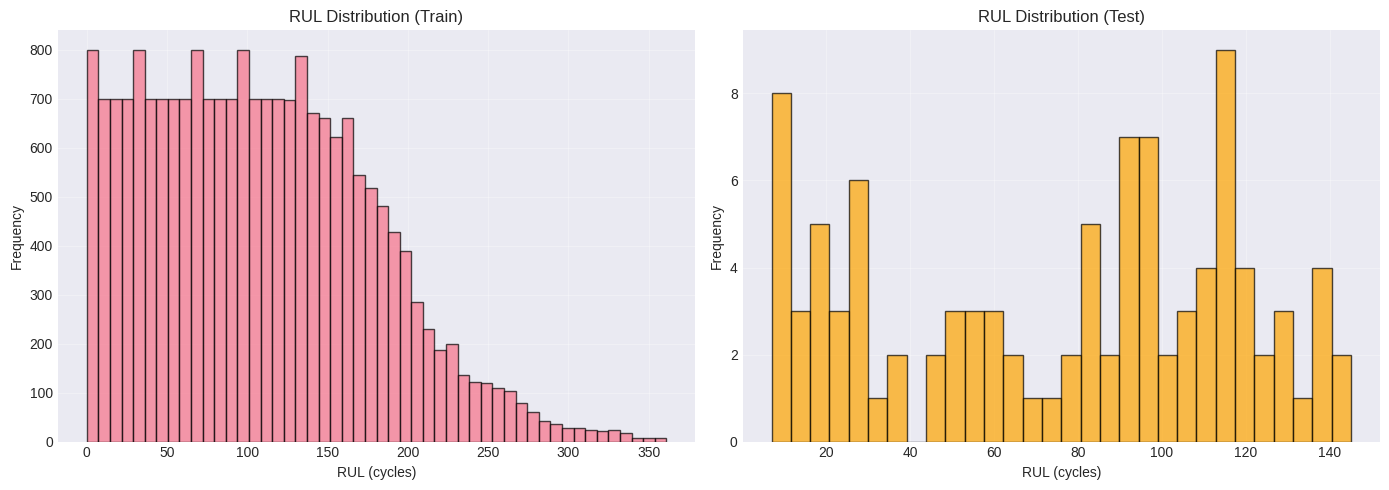

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(train['RUL'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('RUL (cycles)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('RUL Distribution (Train)')
axes[0].grid(True, alpha=0.3)

axes[1].hist(rul['RUL'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('RUL (cycles)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('RUL Distribution (Test)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## RUL Distribution Comparison

### Train Distribution (Left - Pink)
- **Shape:** Approximately exponential decay
- **Peak:** High frequency at low RUL (0-50 cycles) with ~800 samples
- **Pattern:** Decreases as RUL increases
- **Range:** 0 to ~362 cycles
- **Interpretation:** More data points near failure (low RUL) because we sample throughout entire engine life

### Test Distribution (Right - Orange)
- **Shape:** More uniform/scattered
- **Peak:** Highest at ~112 cycles with 9 engines
- **Pattern:** Irregular distribution across RUL range
- **Range:** ~10 to ~140 cycles
- **Interpretation:** Test engines stopped at random points before failure

### Key Differences
- **Train:** Overrepresents low RUL (near-failure states)
- **Test:** More balanced across RUL values
- **Implication:** Model trained on train data sees more failure patterns but must predict diverse RUL values in test

### Why This Matters
Models may overfit to low-RUL patterns since train data is skewed toward failure states. Need to ensure model generalizes to higher RUL predictions common in test set.

In [17]:
print("RUL Train:")
print(train['RUL'].describe())
print("\nRUL Test:")
print(rul['RUL'].describe())

RUL Train:
count    20631.000000
mean       107.807862
std         68.880990
min          0.000000
25%         51.000000
50%        103.000000
75%        155.000000
max        361.000000
Name: RUL, dtype: float64

RUL Test:
count    100.00000
mean      75.52000
std       41.76497
min        7.00000
25%       32.75000
50%       86.00000
75%      112.25000
max      145.00000
Name: RUL, dtype: float64


In [18]:
summary = {
    'Train engines': train['unit_id'].nunique(),
    'Test engines': test['unit_id'].nunique(),
    'Average cycles': cycles_per_unit.mean(),
    'Total sensors': len(sensor_cols),
    'Constant sensors': len(constant_sensors),
    'Useful sensors': len(useful_sensors),
    'Avg RUL train': train['RUL'].mean(),
    'Avg RUL test': rul['RUL'].mean()
}

summary_df = pd.DataFrame(summary, index=[0]).T
summary_df.columns = ['Value']
print(summary_df)

                       Value
Train engines     100.000000
Test engines      100.000000
Average cycles    206.310000
Total sensors      21.000000
Constant sensors    7.000000
Useful sensors     12.000000
Avg RUL train     107.807862
Avg RUL test       75.520000
